In [87]:
# Importing the required Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [88]:
# Load the red wine dataset

red_wine_df = pd.read_csv("winequality-red.csv", sep=';')

# Load the white wine dataset

white_wine_df = pd.read_csv("winequality-white.csv", sep=';')

In [89]:
# Add a wine_type column

red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'

In [90]:
# Concatenate the dataframes

wine_df = pd.concat([red_wine_df, white_wine_df], axis=0, ignore_index=True)

In [91]:
# Set the binary class label

wine_df['good_quality'] = wine_df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [92]:
# Drop the original "quality" column

wine_df.drop('quality', axis=1, inplace=True)

In [93]:
# Separate features and target variable

X = wine_df.drop(['good_quality', 'wine_type'], axis=1).values
y = wine_df['good_quality'].values

In [94]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
# Create and fit the Logistic Regression model

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [96]:
# Create and fit the Decision Tree model

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
# Create and fit the Random Forest model

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
# Define parameter grids for each model

lr_param_grid = {'C': [0.1, 1, 10]}
dt_param_grid = {'max_depth': [3, 5, 7]}
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}

In [99]:
# Perform grid search with cross-validation for each model

lr_grid = GridSearchCV(lr_model, lr_param_grid, cv=5)
lr_grid.fit(X_train, y_train)

dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=5)
dt_grid.fit(X_train, y_train)

rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [50, 100, 200]})

In [100]:
# Get the best models

best_lr_model = lr_grid.best_estimator_
best_dt_model = dt_grid.best_estimator_
best_rf_model = rf_grid.best_estimator_

In [101]:
# Make predictions

lr_predictions = best_lr_model.predict(X_test)
dt_predictions = best_dt_model.predict(X_test)
rf_predictions = best_rf_model.predict(X_test)

In [102]:
# Calculate accuracy for Logistic Regression

lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

# Calculate accuracy for Decision Tree

dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Calculate accuracy for Random Forest

rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Logistic Regression Accuracy: 0.8184615384615385
Decision Tree Accuracy: 0.8302564102564103
Random Forest Accuracy: 0.884102564102564


In [103]:
# Evaluate models

print("Logistic Regression:")
print(classification_report(y_test, lr_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, lr_predictions))

print("Decision Tree:")
print(classification_report(y_test, dt_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, dt_predictions))

print("Random Forest:")
print(classification_report(y_test, rf_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_predictions))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1585
           1       0.55      0.16      0.25       365

    accuracy                           0.82      1950
   macro avg       0.69      0.57      0.57      1950
weighted avg       0.78      0.82      0.78      1950

ROC-AUC Score: 0.5656799619722571
Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1585
           1       0.55      0.47      0.51       365

    accuracy                           0.83      1950
   macro avg       0.72      0.69      0.70      1950
weighted avg       0.82      0.83      0.82      1950

ROC-AUC Score: 0.6920833153277732
Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1585
           1       0.76      0.55      0.64       365

    accuracy                           0.88      1950
   macro 

In [104]:
# Get the absolute values of the coefficients

lr_feature_importance = np.abs(best_lr_model.coef_[0])

# Feature importance for Decision Tree model

dt_feature_importance = dt_model.feature_importances_

# Feature importance for Random Forest model

rf_feature_importance = rf_model.feature_importances_

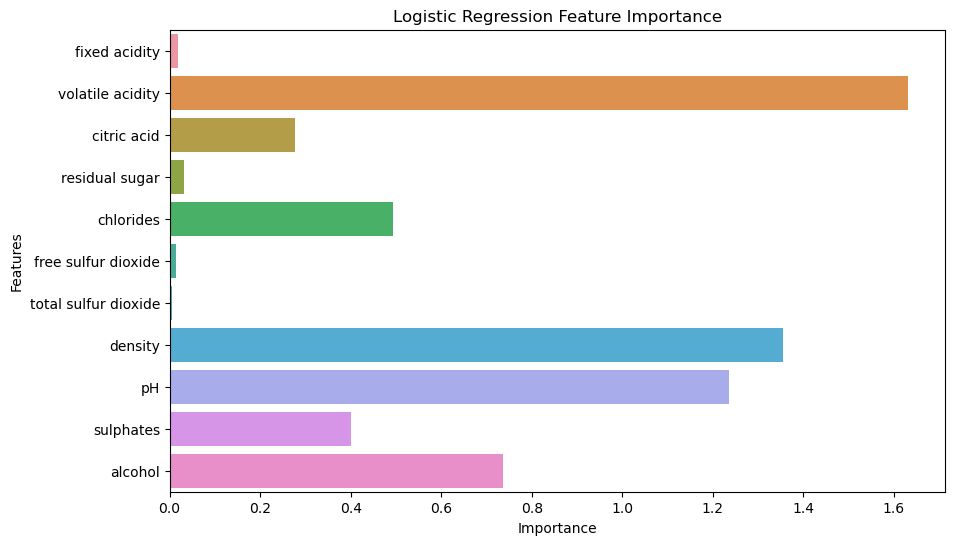

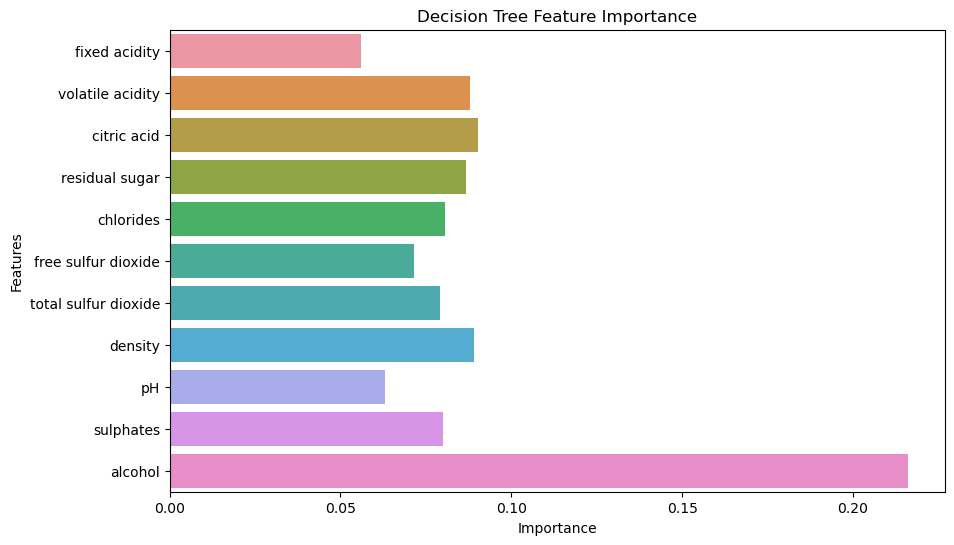

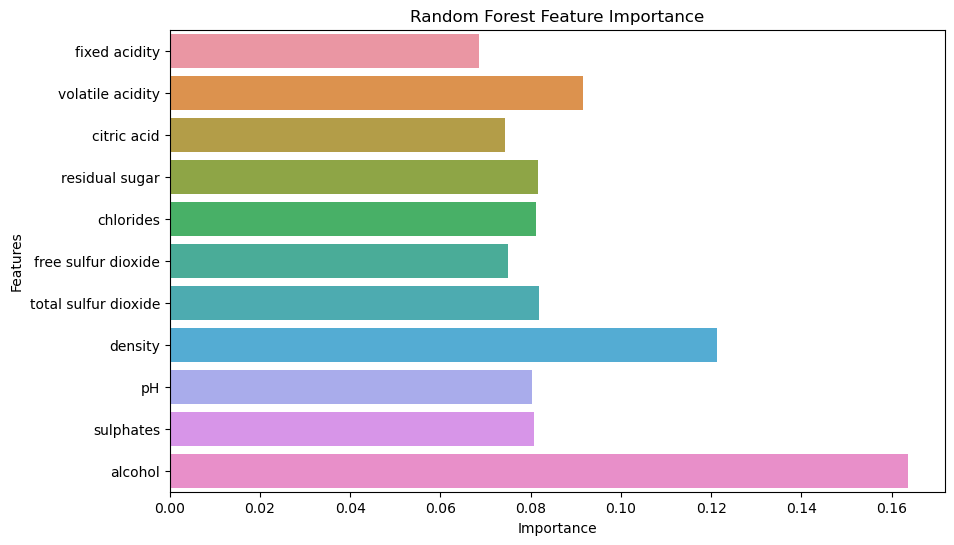

In [105]:
# Plot feature importance for Logistic Regression

plt.figure(figsize=(10, 6))
sns.barplot(x=lr_feature_importance, y=wine_df.drop(['good_quality', 'wine_type'], axis=1).columns)
plt.title("Logistic Regression Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Plot feature importance for Decision Tree

plt.figure(figsize=(10, 6))
sns.barplot(x=dt_feature_importance, y=wine_df.drop(['good_quality', 'wine_type'], axis=1).columns)
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Plot feature importance for Random Forest

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importance, y=wine_df.drop(['good_quality', 'wine_type'], axis=1).columns)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [106]:
lr_probabilities = best_lr_model.predict_proba(X_test)[:, 1]
dt_probabilities = best_dt_model.predict_proba(X_test)[:, 1]
rf_probabilities = best_rf_model.predict_proba(X_test)[:, 1]

In [107]:
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probabilities)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_probabilities)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probabilities)

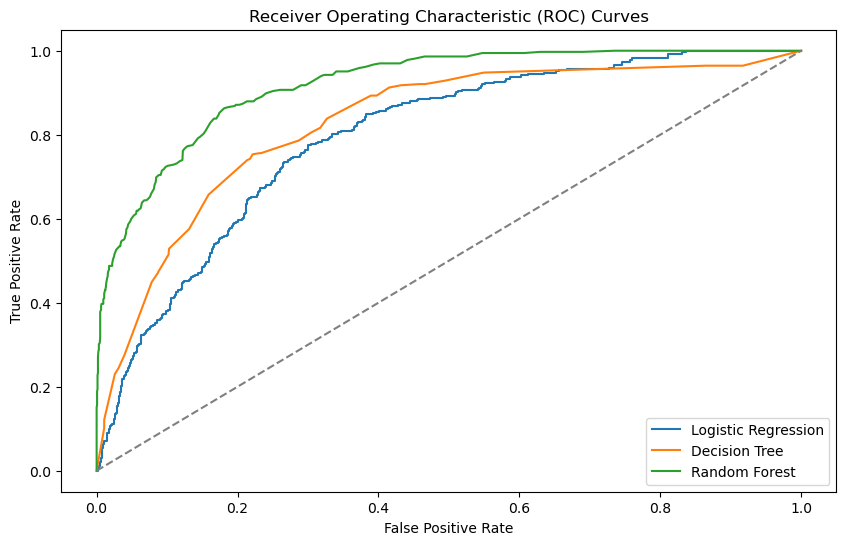

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

In [109]:
features_df = pd.DataFrame(X, columns=wine_df.drop(['good_quality', 'wine_type'], axis=1).columns)
features_df['good_quality'] = y

<Figure size 1000x600 with 0 Axes>

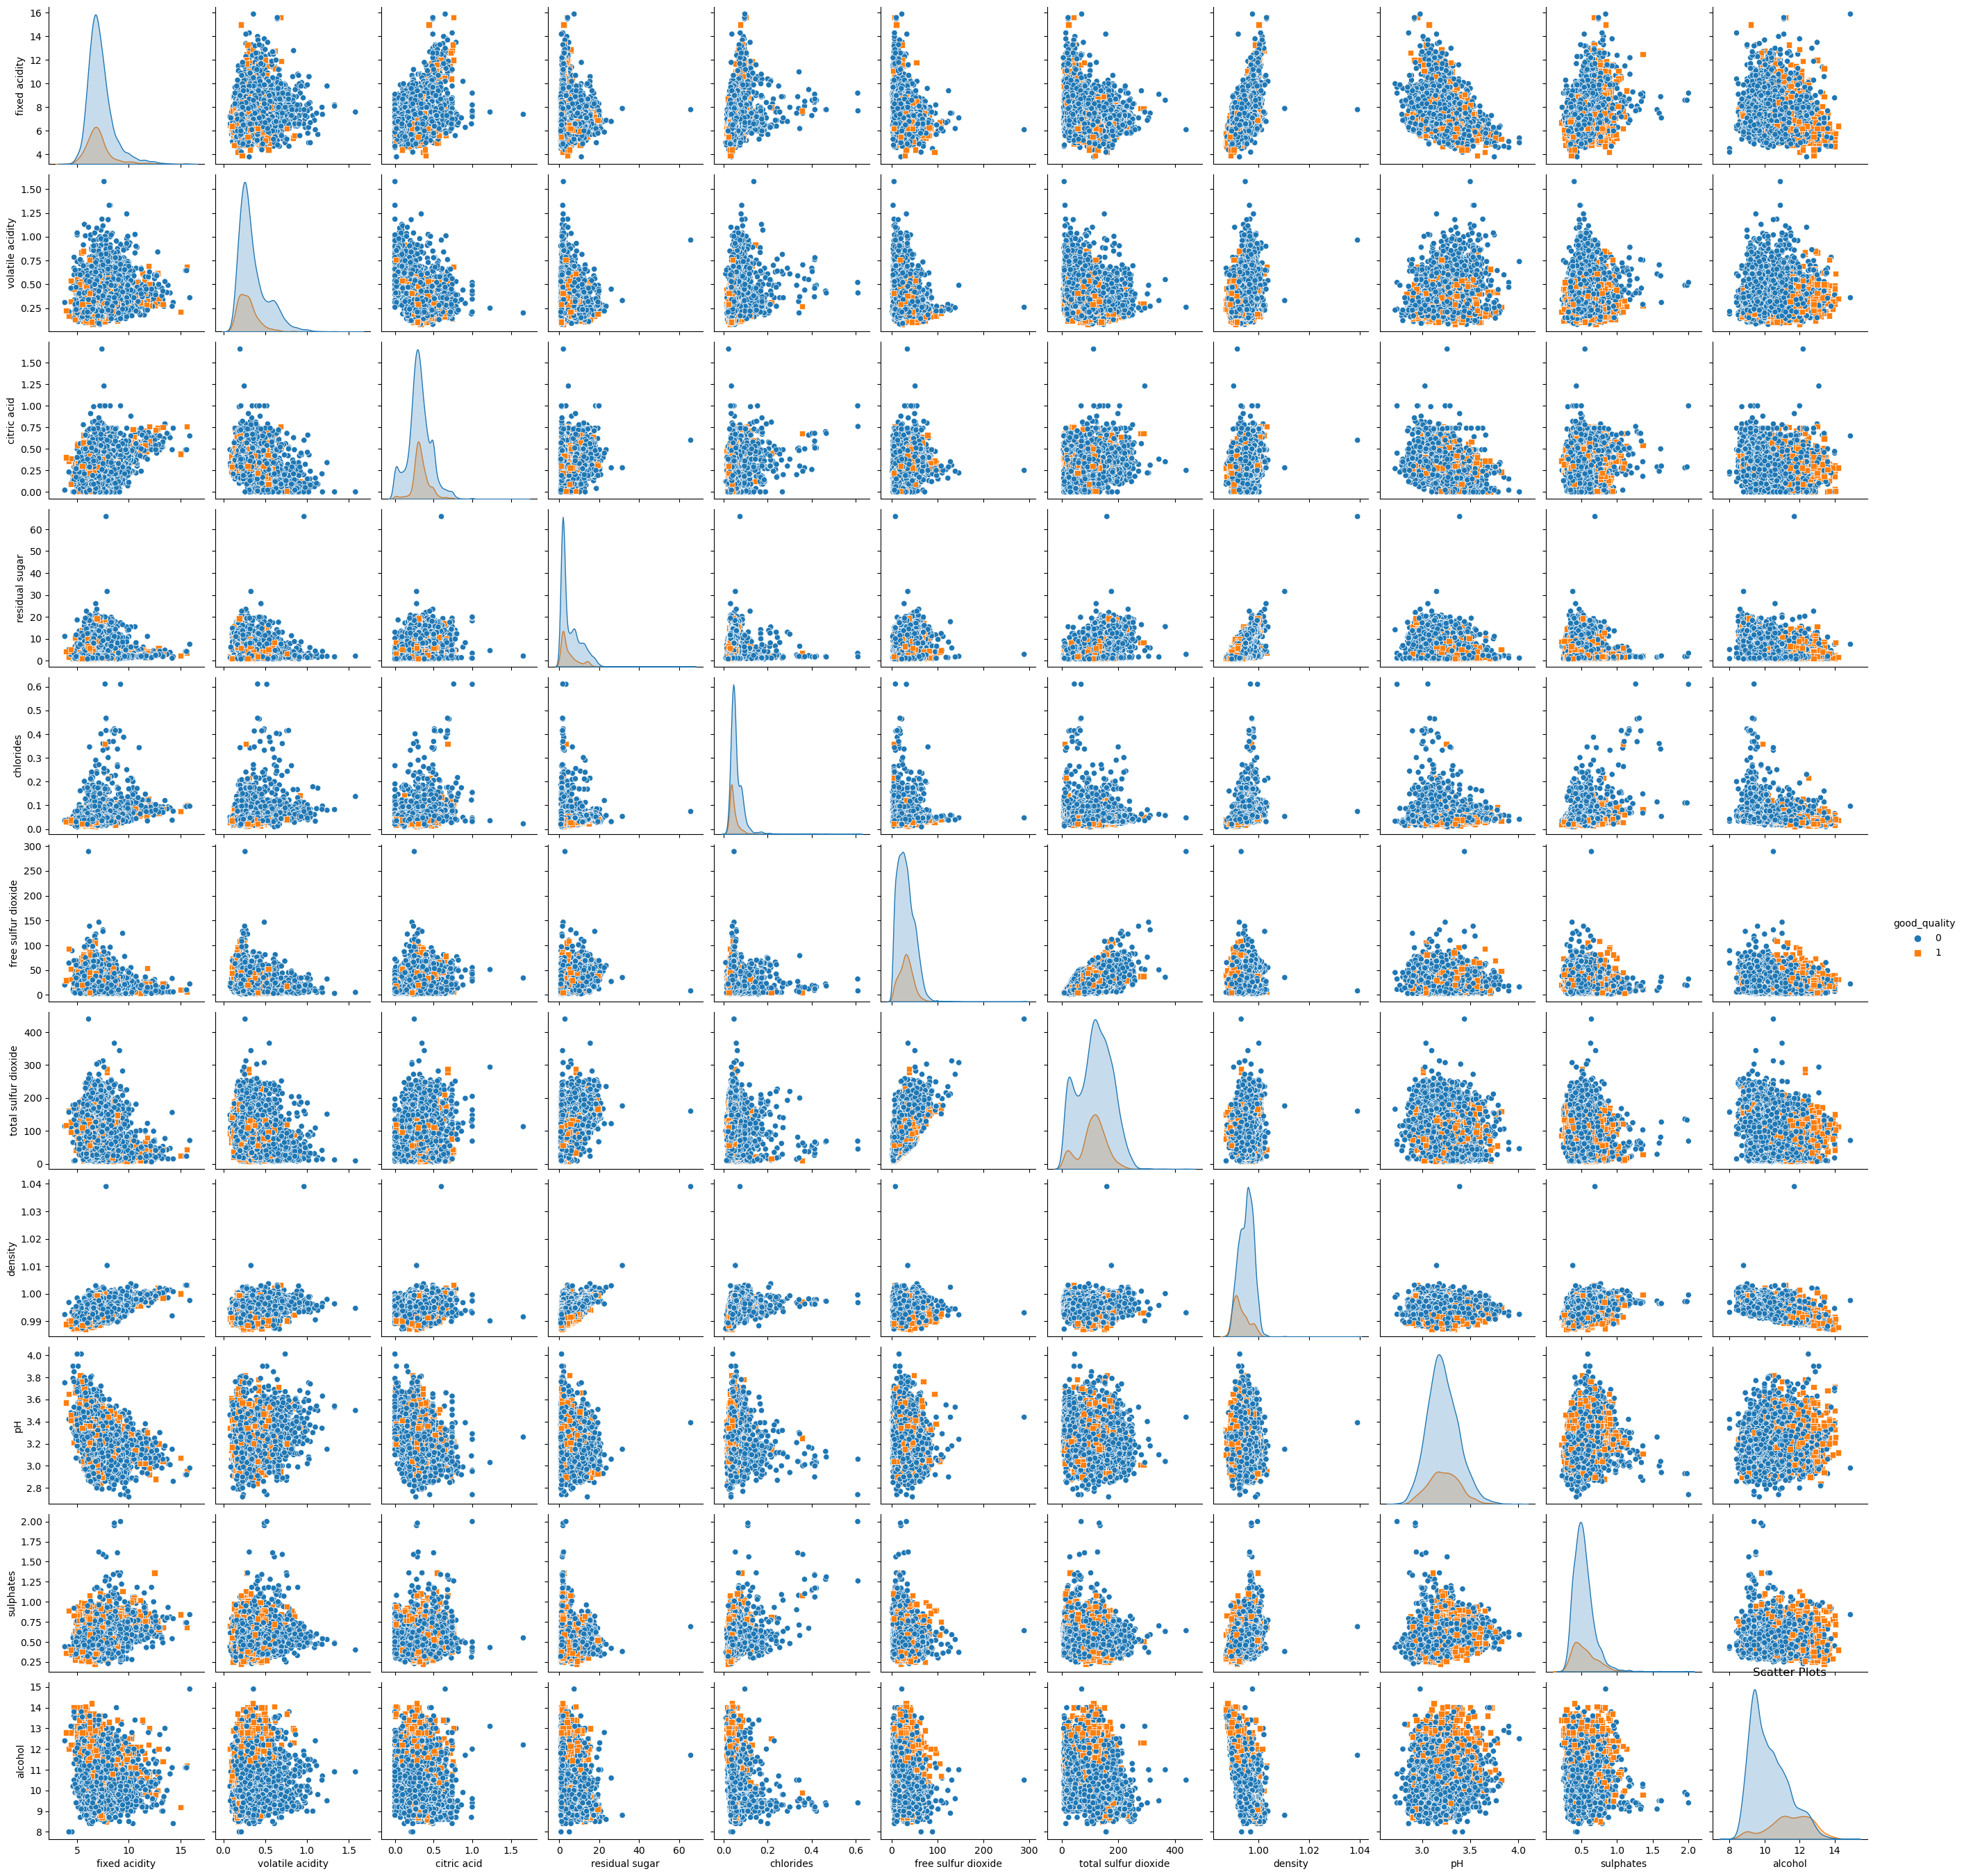

In [110]:
plt.figure(figsize=(10, 6))
sns.pairplot(features_df, hue='good_quality', markers=['o', 's'])
plt.title('Scatter Plots')
plt.show()